# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',None)

# Data Understanding

In [2]:
# load the data set
df = pd.read_csv("train.csv")

In [3]:
# let us view the top few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# statistic about the dataset
df.describe()

- Hypothesis : The childern who are less than 2 years old are not charge anything

In [7]:
df.describe() # Statistics of NUmerical cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df[df['Age']<2].sort_values("Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S


In [11]:
df[df['Fare']==0].sort_values("Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S


In [12]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lewy, Mr. Ervin G",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


- Hypothesis : There might be possibility that only a single ticket a family is travelling (combined ticket)

In [15]:
df.groupby("Ticket")['Ticket'].count().to_frame()

,Ticket
Ticket,
110152,3
110413,3
110465,2
110564,1
110813,1
111240,1
111320,1
111361,2
111369,1


In [17]:
df[df['Ticket'] =="110152"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


- There are passengers in the ship who are travelling on the combined ticket,They could be either family or friends.

In [18]:
# check the missing values
round(df.isnull().sum()/len(df)*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

# How Many people survived.?

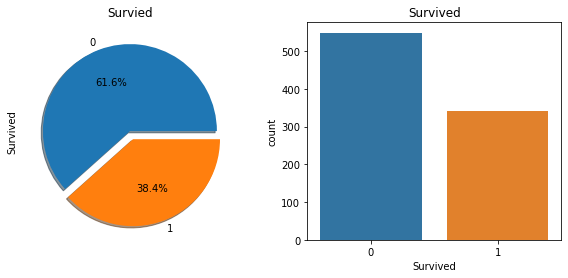

In [19]:
f, ax = plt.subplots(1,2, figsize=(10,4)) # creating a blank figure

df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow = True)
ax[0].set_title('Survied')
ax[0].set_label('')
sns.countplot('Survived',data=df,ax =ax[1])
ax[1].set_title('Survived')
plt.show()

# Analyse the categorical Features

## 1. How many Male and Female Survived.?

In [35]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [23]:
pd.crosstab(df.Sex,df.Survived,margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [24]:
df[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


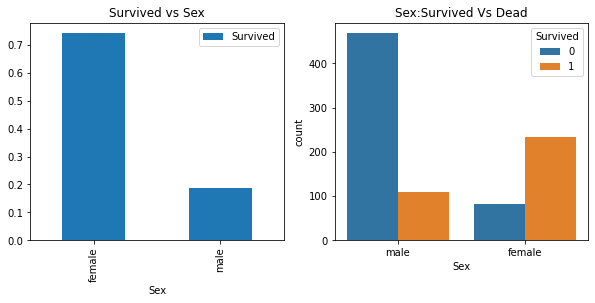

In [25]:
f, ax = plt.subplots(1,2,figsize=(10,4))

df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue="Survived",data=df,ax=ax[1])
ax[1].set_title('Sex:Survived Vs Dead')
plt.xticks()
plt.show()

# Analyse the dataset on the basis of class (Pclass - Ordinal Feature)

In [26]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [27]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

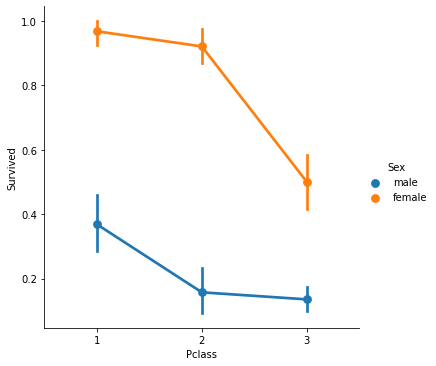

In [28]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

# Continuous Feature : Age

In [29]:
df['Age'].max()

80.0

In [31]:
df['Age'].min()

0.42

In [32]:
df['Age'].mean()

29.69911764705882

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

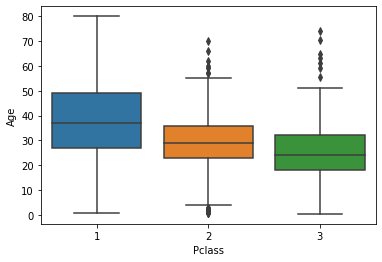

In [34]:
sns.boxplot("Pclass","Age",data=df)

In [ ]:
Lower Whiskers
Quartile-1(Q1) : 25%
Median (50%)
Quartile-3 (Q3) : 75%
Upper Whisker's
IQR(Inter Quartile Range) : Q3-Q1
Lower Whiskers : Q1 - 1.5 *IQR
Upper Whiskers : Q3 + 1.5 *IQR

In [35]:
df[df['Age']==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [36]:
df.groupby("Pclass")['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

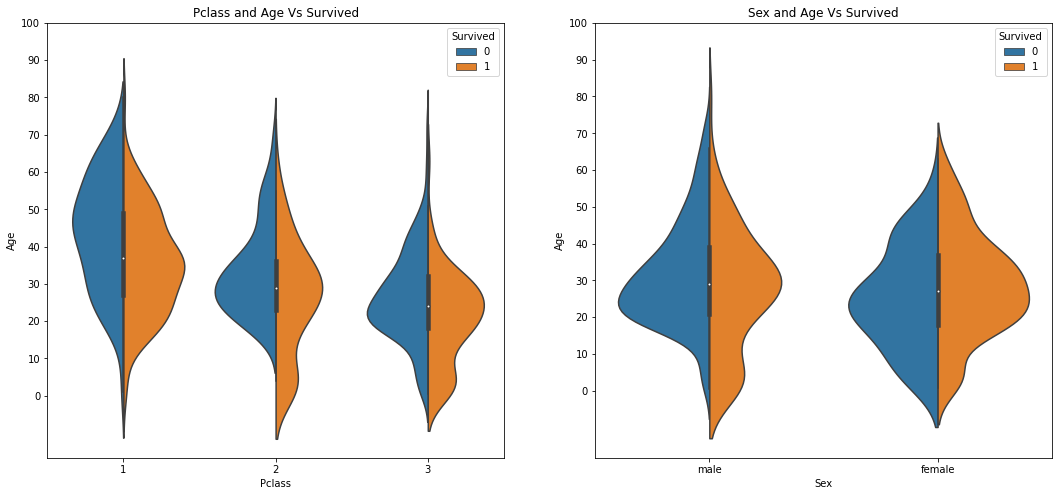

In [37]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=df,split=True,ax=ax[0])
ax[0].set_title("Pclass and Age Vs Survived")
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age",hue="Survived",data=df,split=True,ax=ax[1])
ax[1].set_title("Sex and Age Vs Survived")
ax[1].set_yticks(range(0,110,10))

plt.show()

- Number of children increases as the Pclass Increases.
- Survial Rate for passenegrs below 10 years is good irrespective of any class they are travelling.
- Survival chances for passengers between 20-50 for Pclass-1 is high & if they are women it is more better.
- Survival chances of age decreases as age increases for male passengers.

# Nominal Feature : Name

In [ ]:
regex  function :
([A-Za-z]+)\.'

([A-Za-z]+)\.

In [53]:
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [57]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [58]:
df[df['Initial']=='Mlle']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,Mlle


In [59]:
df[df['Initial']=='Mme']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,B35,C,Mme


In [63]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                     ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [64]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

# On the basis of initials we will take a decision to impute the age
- Techniques of Imputation (Basic)
    - Mean
    - Mode
    - Median
    - Forward Fill
    - Backward Fill

In [68]:
df.loc[(df['Age'].isnull()) & (df['Initial']=='Master'),"Age"] = 5
df.loc[(df['Age'].isnull()) & (df['Initial']=='Miss'),"Age"] = 22
df.loc[(df['Age'].isnull()) & (df['Initial']=='Mr'),"Age"] = 33
df.loc[(df['Age'].isnull()) & (df['Initial']=='Mrs'),"Age"] = 36
df.loc[(df['Age'].isnull()) & (df['Initial']=='Other'),"Age"] = 46

In [69]:
df['Age'].isnull().sum()

0

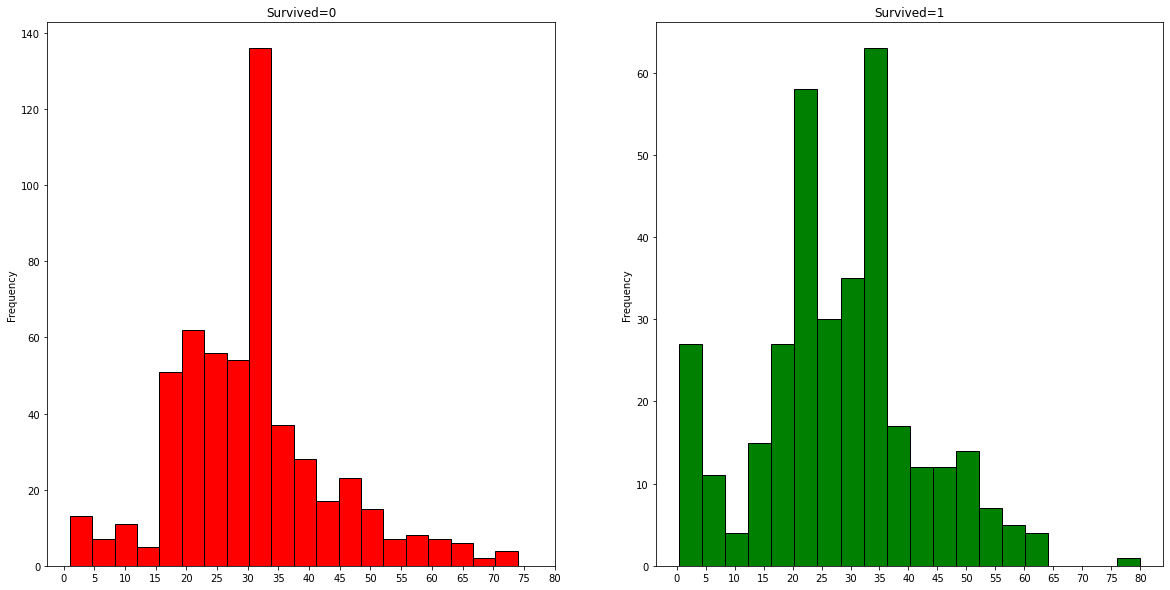

In [71]:
f,ax =plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor="black",color="red")
ax[0].set_title("Survived=0")
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)


df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor="black",color="green")
ax[1].set_title("Survived=1")
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

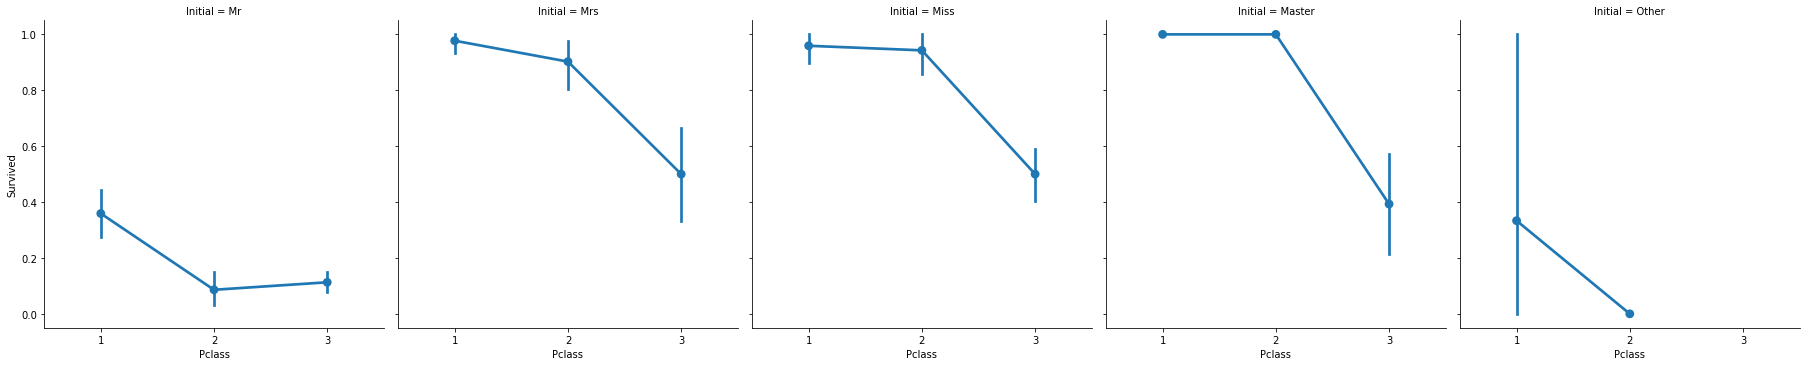

In [84]:
sns.factorplot("Pclass","Survived",col="Initial", data=df)
plt.show()

- Females & Children are given the first priority

# Embarked

In [90]:
pd.crosstab(df.Embarked,df.Survived).style.background_gradient(cmap="summer_r")

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [87]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived]).style.background_gradient(cmap="summer_r")

### Chances of Survival on basis of Port of Embarkation

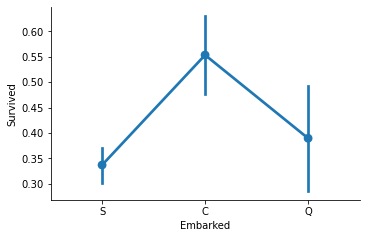

In [89]:
sns.factorplot('Embarked','Survived',data=df)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

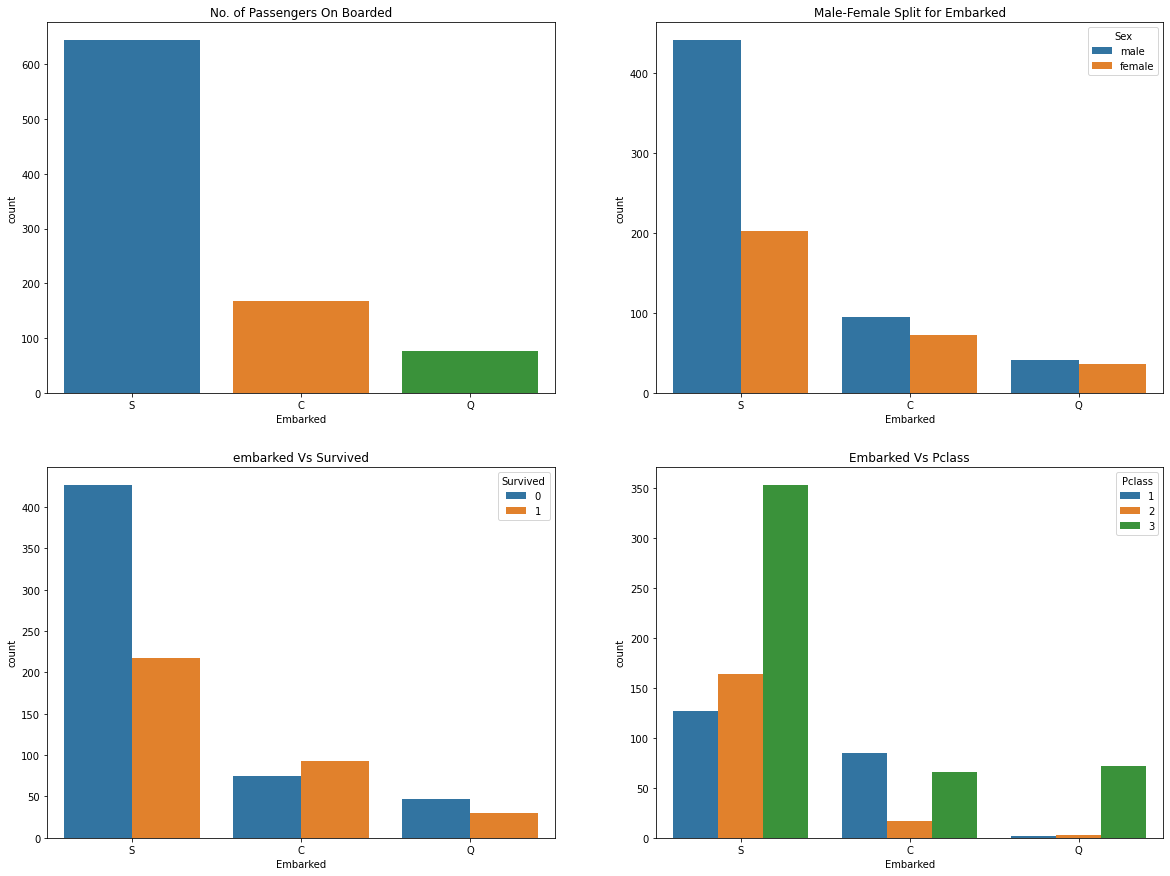

In [93]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot("Embarked",data= df, ax= ax[0,0])
ax[0,0].set_title("No. of Passengers On Boarded")

sns.countplot("Embarked",hue="Sex",data= df, ax= ax[0,1])
ax[0,1].set_title("Male-Female Split for Embarked")

sns.countplot("Embarked",hue="Survived",data= df, ax= ax[1,0])
ax[1,0].set_title("embarked Vs Survived")

sns.countplot("Embarked",hue="Pclass",data= df, ax= ax[1,1])
ax[1,1].set_title("Embarked Vs Pclass")

plt.show()

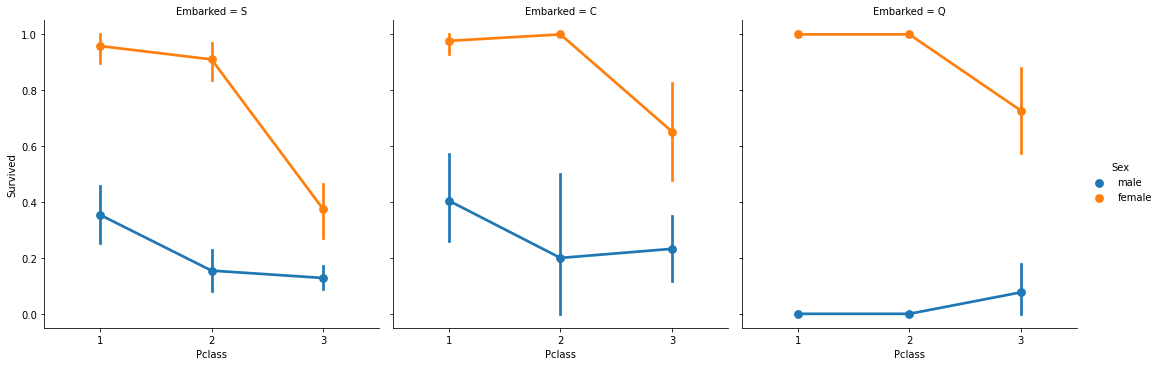

In [94]:
sns.factorplot("Pclass","Survived",hue="Sex",col="Embarked",data=df)

In [97]:
# Impute the Embarked : Mode / directly fill the missing values with Port "S"
df['Embarked'].fillna("S",inplace= True)

In [96]:
df['Embarked'].mode()[0]

'S'

In [98]:
df.Embarked.isnull().sum()

0

# Discrete Features 
SibSp : This feature represents that the person is alone or with a family<br>
siblings: broter, sister, step brother, step sister<br>
Spouse : husband & wife

In [100]:
pd.crosstab(df.SibSp,df.Survived).style.background_gradient(cmap="summer_r")

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


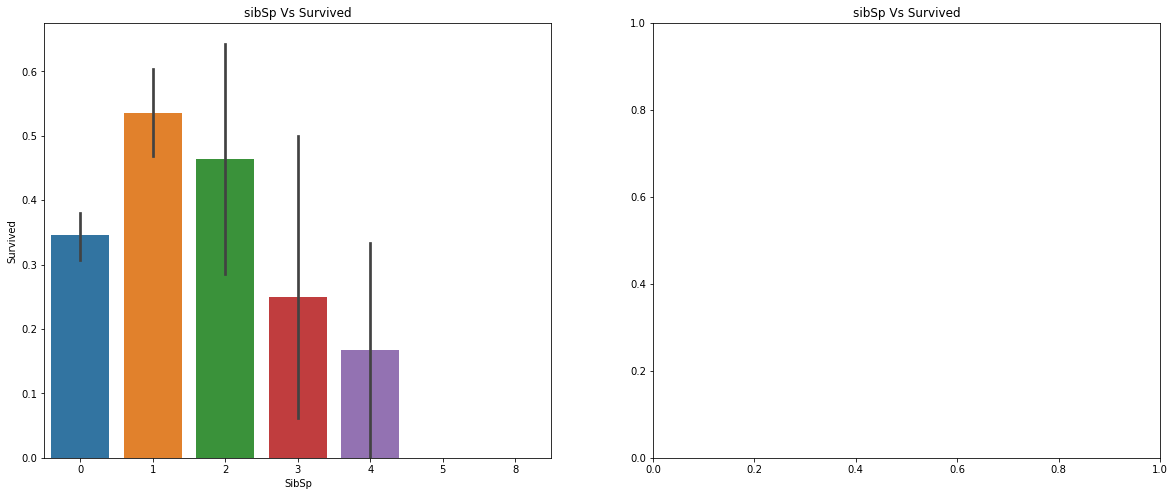

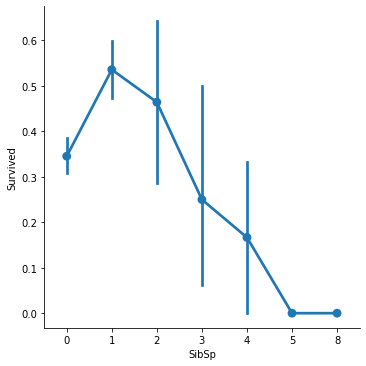

In [103]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot("SibSp","Survived",data=df,ax=ax[0])
ax[0].set_title("sibSp Vs Survived")

sns.factorplot("SibSp","Survived",data=df,ax=ax[1])
ax[1].set_title("sibSp Vs Survived")
plt.show()


# Parch

In [104]:
pd.crosstab(df.Parch,df.Survived).style.background_gradient(cmap="summer_r")

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


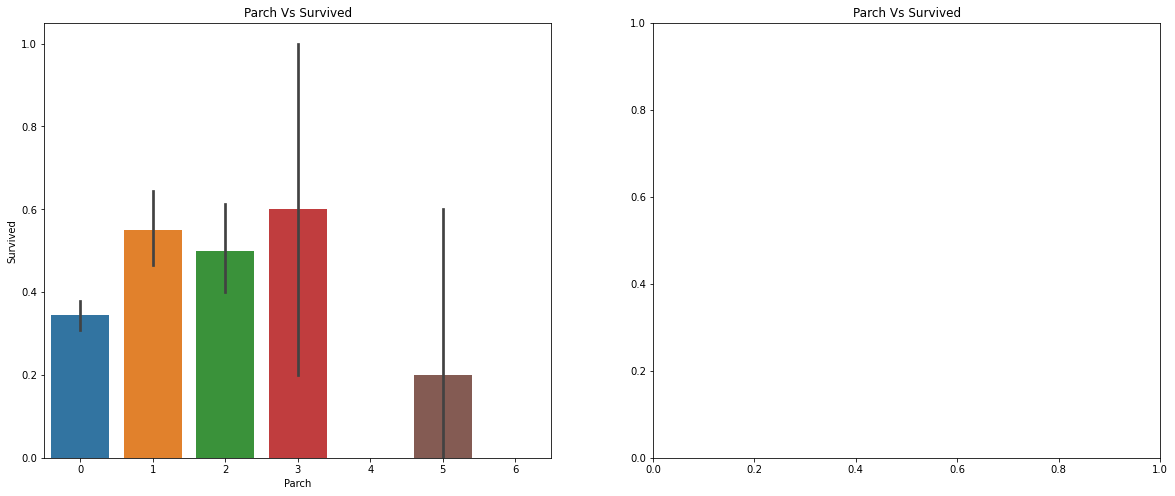

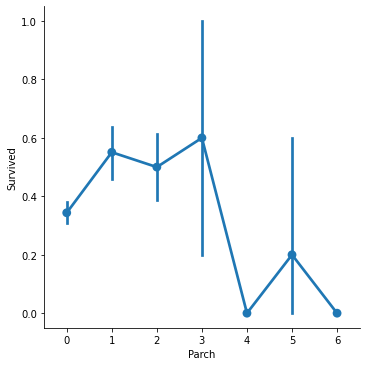

In [105]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot("Parch","Survived",data=df,ax=ax[0])
ax[0].set_title("Parch Vs Survived")

sns.factorplot("Parch","Survived",data=df,ax=ax[1])
ax[1].set_title("Parch Vs Survived")
plt.show()


# Continuous Feature  : Fare

Text(0.5, 1.0, 'Fare in Pclass-3')

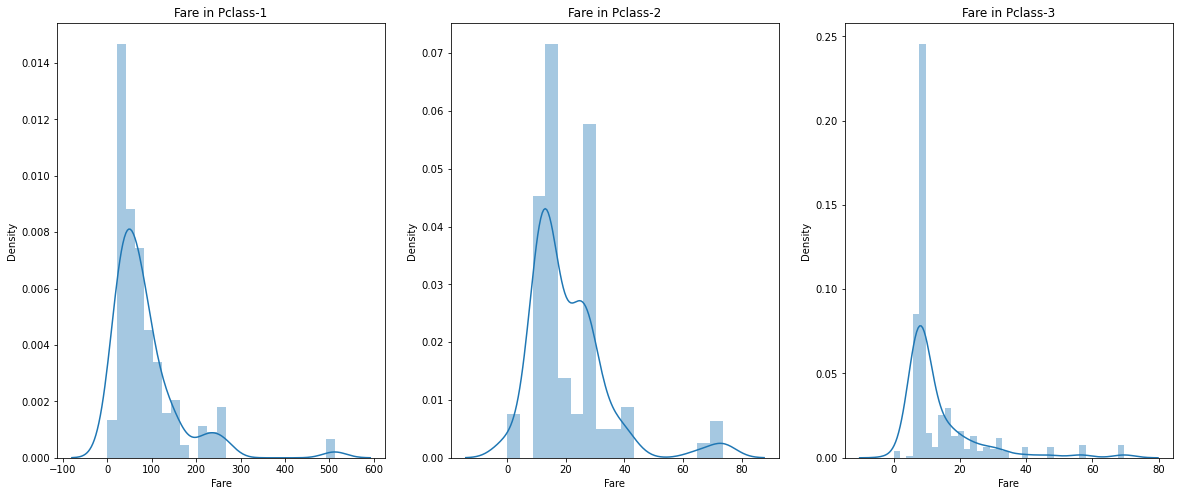

In [107]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(df.loc[df['Pclass']==1,"Fare"],ax=ax[0])
ax[0].set_title("Fare in Pclass-1")

sns.distplot(df.loc[df['Pclass']==2,"Fare"],ax=ax[1])
ax[1].set_title("Fare in Pclass-2")

sns.distplot(df.loc[df['Pclass']==3,"Fare"],ax=ax[2])
ax[2].set_title("Fare in Pclass-3")

# Observations

- Sex : The chances of surival of women is high as compared to men.
- Pclass : There is a visible trend that as the Pclass increases, the survival chances decreases and the fare also decreases.
- Age : Children betwen 5-10 years have high chances of survival. Passenegers between age group 15-35 died a lot.
- Embarked : The chances of survival from Port C is high and Most passenegers boarded the ship from port-S are travellingin class 3.
- Parch +SibSp : Hvaing 1-2 Siblings, Spouse, 1-3 Parents shows a grater chances of survival.

# Correlation between the features

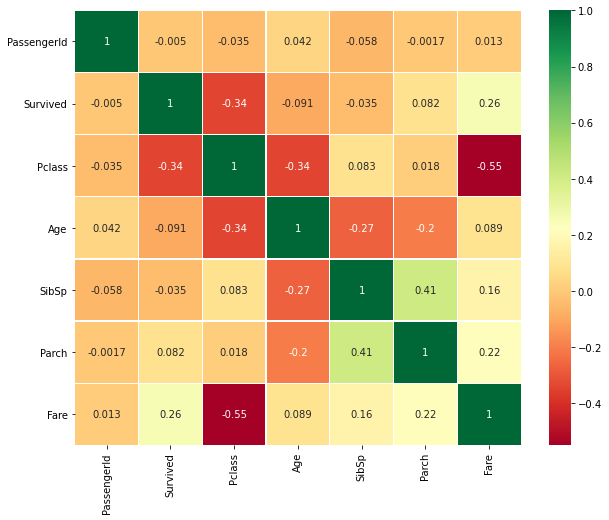

In [108]:
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn",linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Feature Engineering 

We will convert the continuous variables to discrete features.

# Age_band

In [ ]:
max age : 80
bins 5 
: 80/5 = 16 binsize as 16

In [109]:
df['Age_band'] = 0

In [110]:
df.loc[df['Age']<=16,'Age_band'] = 0
df.loc[(df['Age']>16) & (df['Age']<=32),'Age_band'] = 1
df.loc[(df['Age']>32) & (df['Age']<=48),'Age_band'] = 2
df.loc[(df['Age']>48) & (df['Age']<=64),'Age_band'] = 3
df.loc[df['Age']>64,'Age_band'] = 4

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [113]:
df['Age_band'].value_counts().to_frame().style.background_gradient(cmap="summer_r")

,Age_band
1,382
2,325
0,104
3,69
4,11


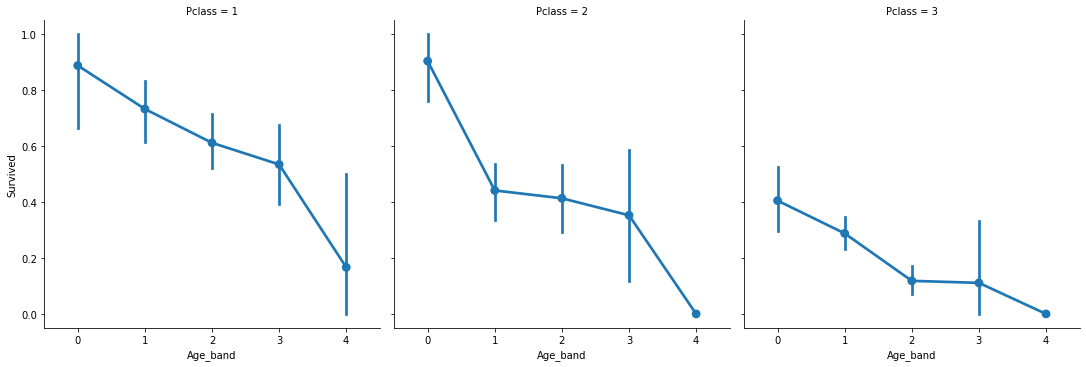

In [114]:
sns.factorplot("Age_band","Survived", data=df, col="Pclass")

# Family_size & Alone

In [115]:
df['Family_size'] = 0
df['Family_size'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0


In [117]:
df['Alone'] = 0
df.loc[df['Family_size']==0,"Alone"] =1

In [118]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


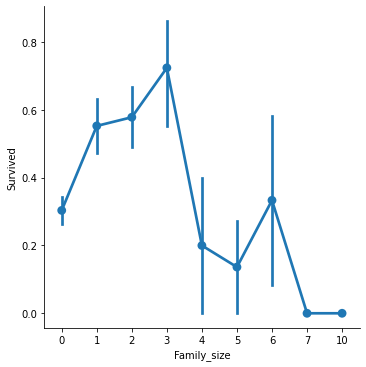

In [119]:
sns.factorplot("Family_size","Survived",data=df)

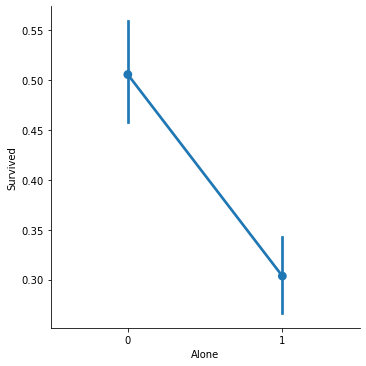

In [120]:
sns.factorplot("Alone","Survived",data=df)

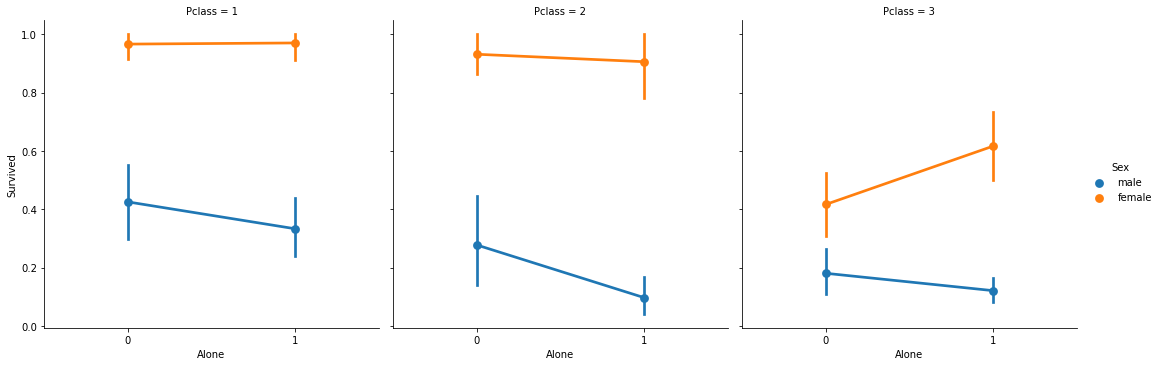

In [122]:
sns.factorplot("Alone","Survived",hue="Sex",col="Pclass",data=df)

# Fare-Range

In [125]:
df['Fare-Range'] = pd.qcut(df['Fare'],4)

In [127]:
df.groupby('Fare-Range')['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare-Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [128]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone,Fare-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]"


In [129]:
df['Fare_Band'] = 0
df.loc[df['Fare']<=7.91,"Fare_Band"] = 0
df.loc[(df['Fare']>7.91) & (df['Fare']<=14.454),"Fare_Band"] = 1
df.loc[(df['Fare']>14.454) & (df['Fare']<=31),"Fare_Band"] = 2
df.loc[(df['Fare']>31) & (df['Fare']<=513),"Fare_Band"] = 3

In [130]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone,Fare-Range,Fare_Band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


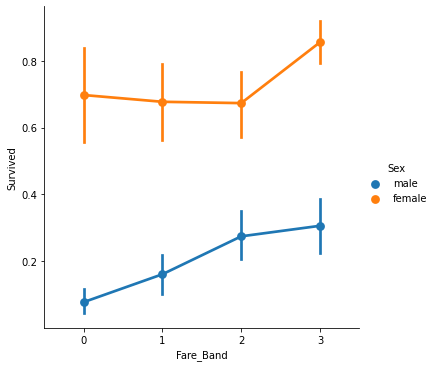

In [131]:
sns.factorplot("Fare_Band","Survived",hue="Sex",data=df)

# Convert the string values to Numeric

In [135]:
df['Sex'].replace(['male','female'],[0,1],inplace=True) 
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True) 
df['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True) 

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_size,Alone,Fare-Range,Fare_Band
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


In [137]:
# Drop the redundant columns or unwanted columns
cols_to_drop = ['Name','Cabin','Ticket','Age','Fare','Fare-Range','PassengerId']
df.drop(cols_to_drop,axis=1,inplace=True)

In [138]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_size,Alone,Fare_Band
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


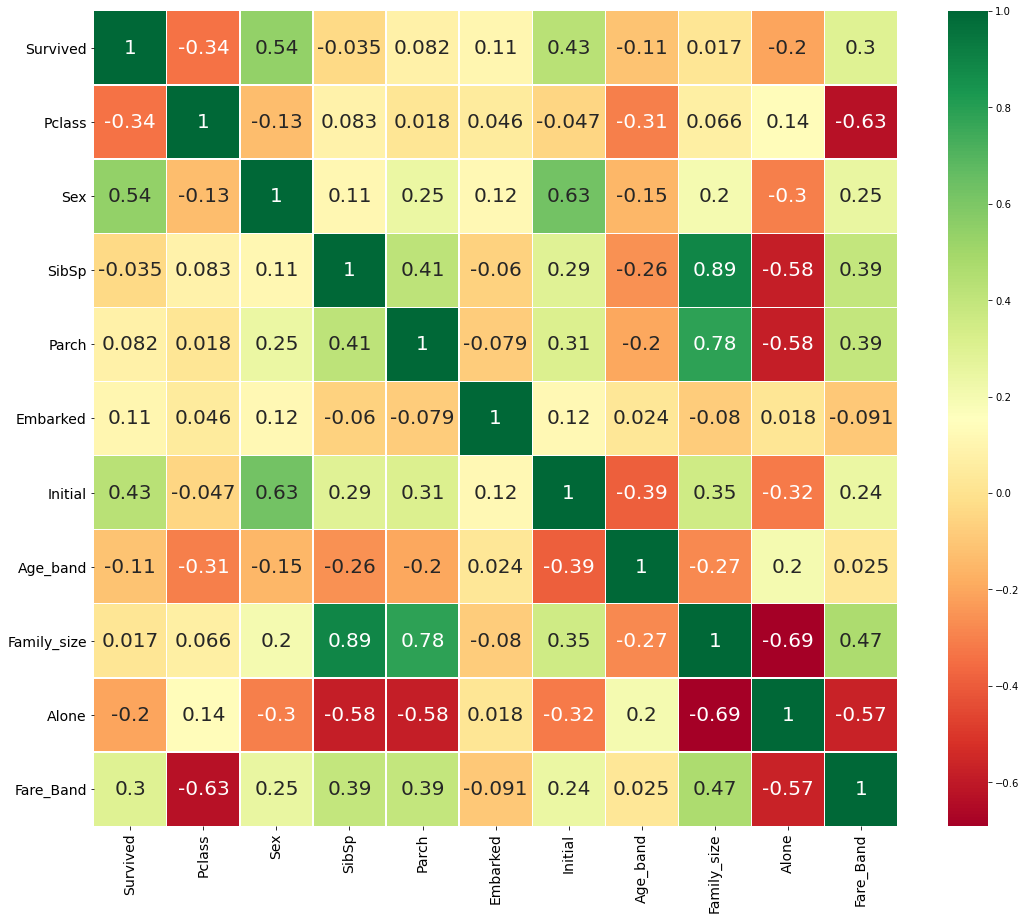

In [141]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

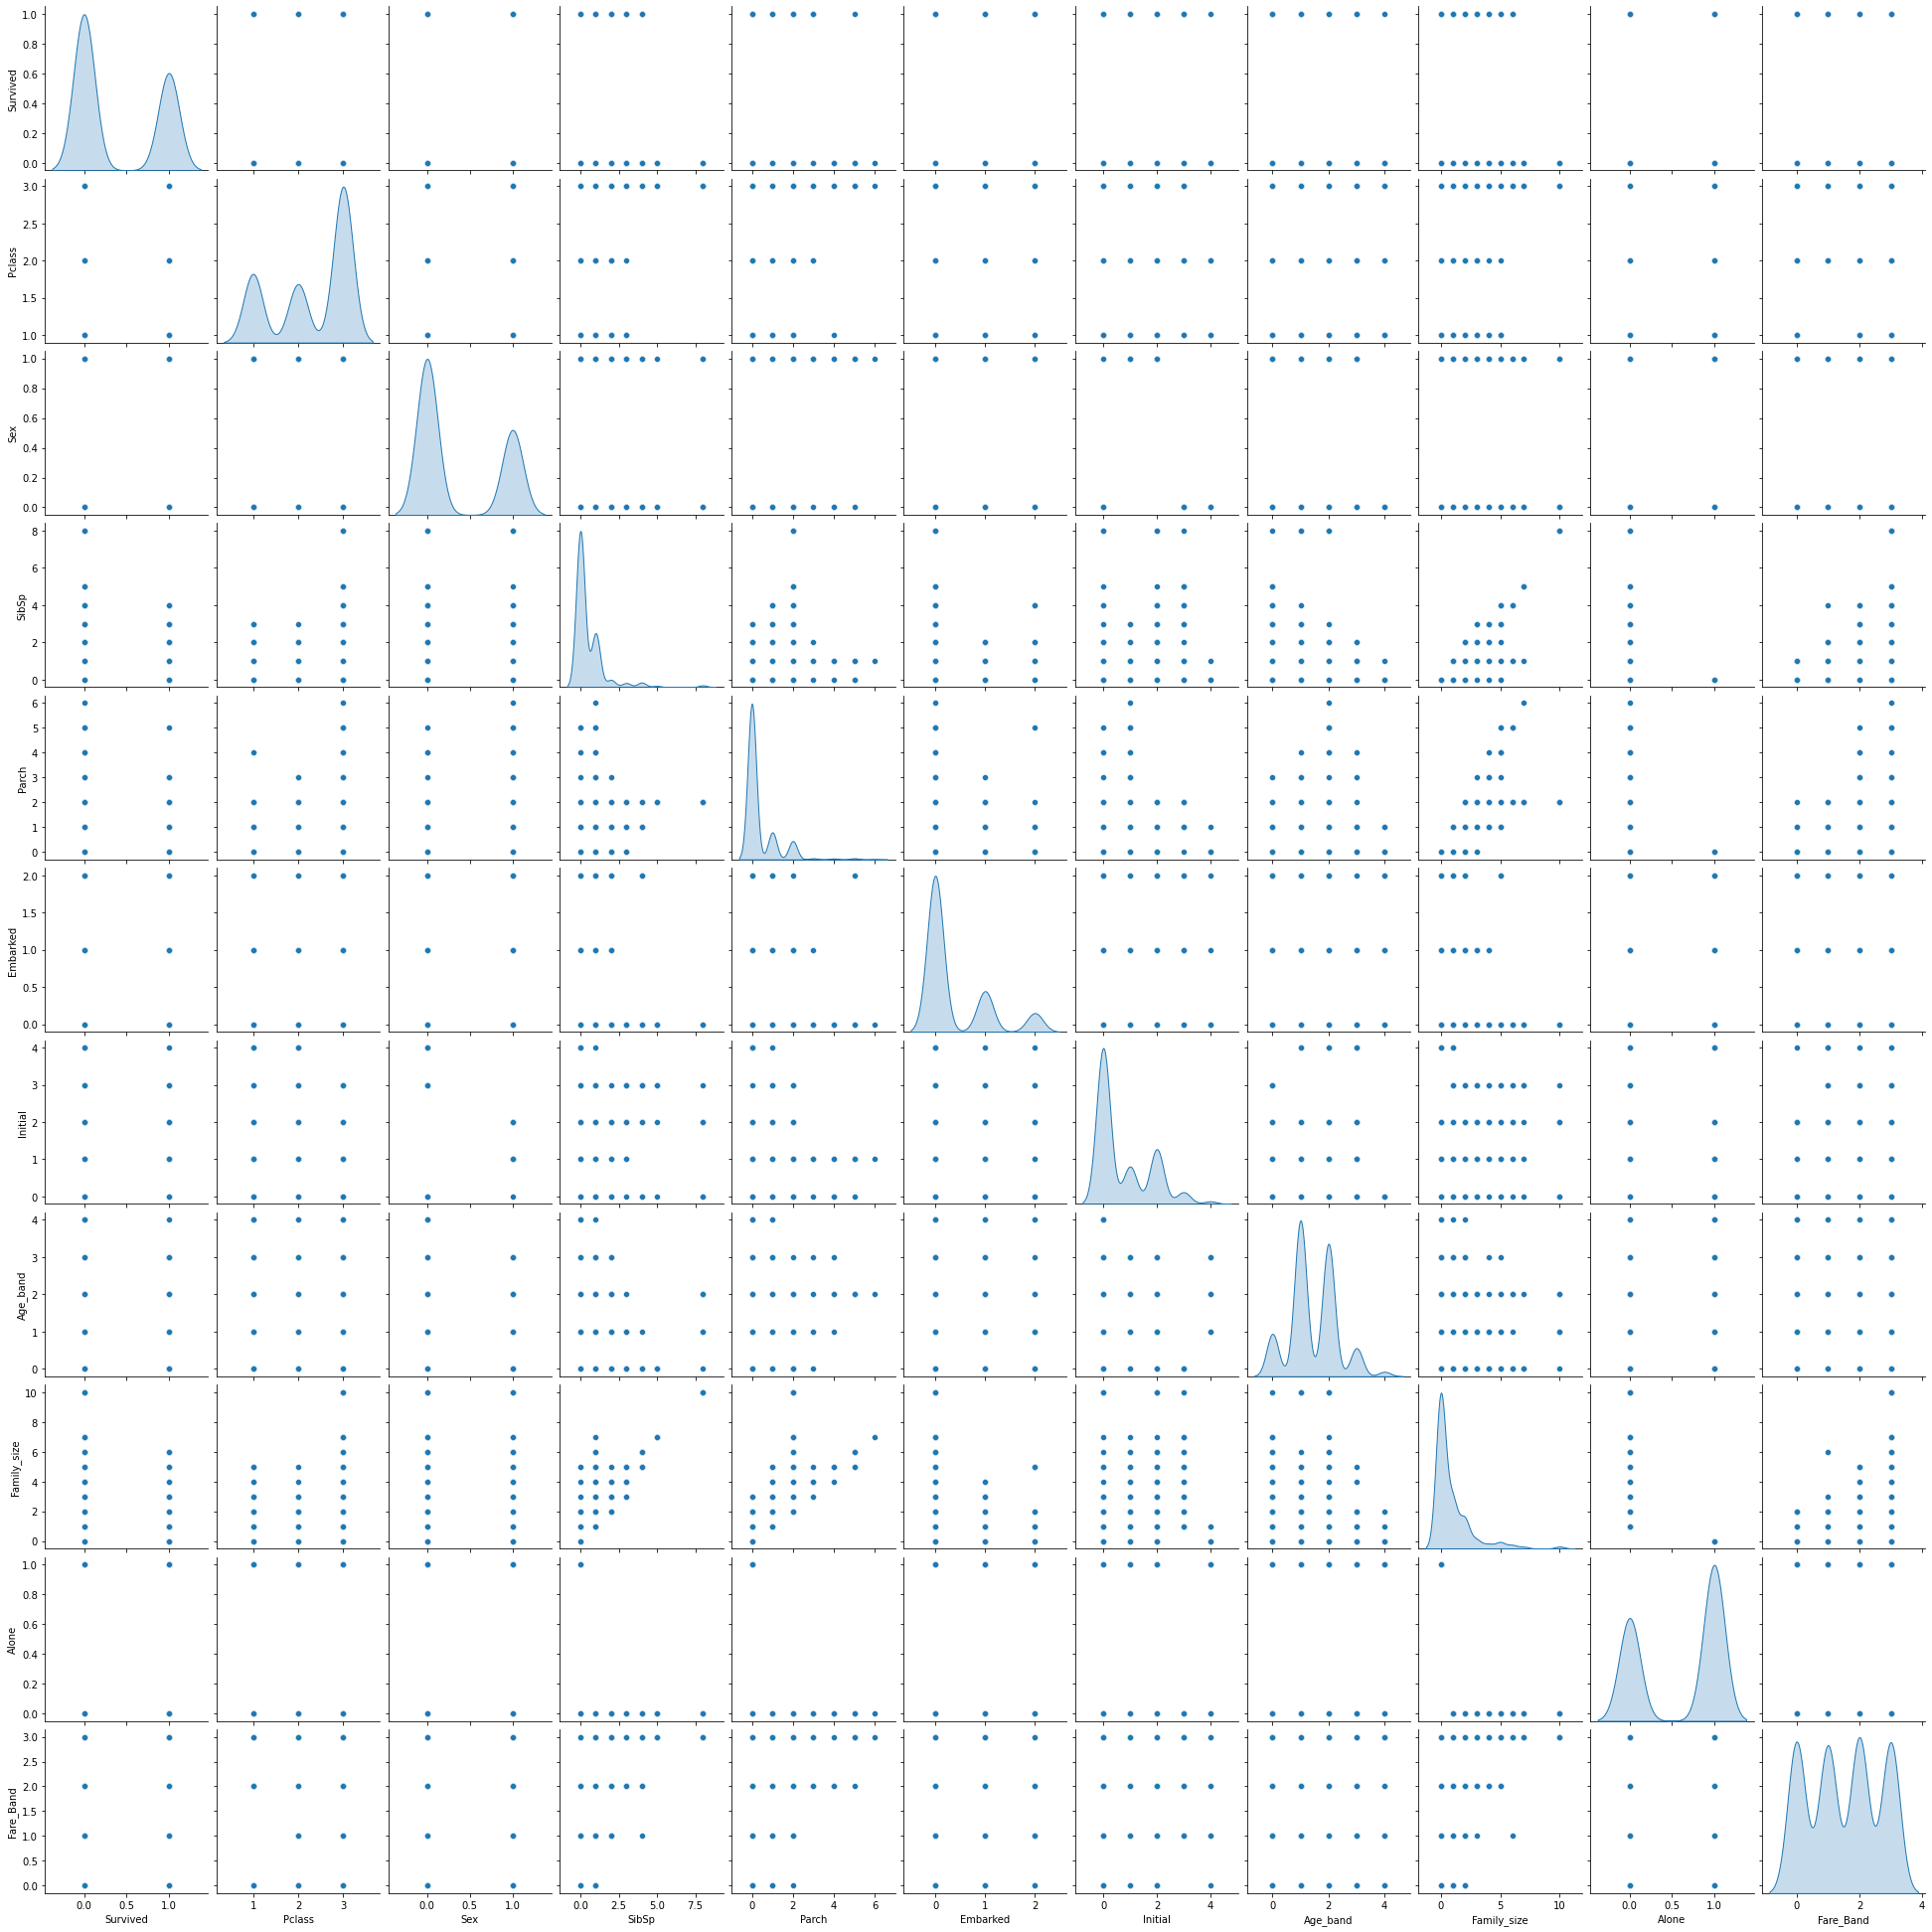

In [144]:
sns.pairplot(df,diag_kind='kde')